#Supply Chain Management Project


OPTIMIZING SUPPLY CHAIN MANAGEMENT USING ML TO ADDRESS SUPPLY CHAIN DISRUPTIONS IN INSTANT NOODLES DELIVERY

---
#SYNOPSIS

#IMPORT LIBRARIES
#READ DATASET
#DUPLICATE CHECK
#CHECKING OUTLIIERS
#EDA OF HIGHLY CORRELATED VARIABLES
#SPLITTING INTO TRAIN AND TEST DATA
#STANDARDIZATION
#MODEL BUILDING
#FINAL MODEL
#PLOT OF Y_TEST ACTUAL VS Y_TEST PREDICTIONS
#CONCULUSION


## Importing Libraries and Loading Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [ ]:
# Load dataset
df = pd.read_csv("/content/supply_train (1).csv")

In [ ]:
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
df.shape

(16620, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

# Data Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [ ]:
# Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'])

In [ ]:
# Checking missing values
df.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [ ]:
# Filling missing values in the 'workers_num' column with the mean value of that column
df['workers_num'].fillna(value=df['workers_num'].mean(), inplace=True)

# Discard the 'wh_est_year' column with nearly half of the values as null
df = df.drop(columns=['wh_est_year'])

In [ ]:
# Filling missing values in the 'approved_wh_govt_certificate' column with the most recent non-null value
df['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)

In [ ]:
# Confirming no more missing values
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [ ]:
df.head(2)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,percentage
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,13,0,0,5,15,17115,0.004660
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,4,0,0,3,17,5074,0.001382


In [ ]:
df['WH_regional_zone'].dtype

dtype('int64')

In [ ]:
df['WH_regional_zone'] = df['WH_regional_zone'].astype(str)

In [ ]:
df['WH_regional_zone'] = df['WH_regional_zone'].apply(lambda x: x[-1])

In [ ]:
df.WH_regional_zone=pd.to_numeric(df.WH_regional_zone)

In [ ]:
df.head(2)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,percentage
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,13,0,0,5,15,17115,0.004660
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,4,0,0,3,17,5074,0.001382


Note :
Here,'WH_regional_zone' is converted into numerical type by slicing the zone in it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int64  
 1   WH_capacity_size              16620 non-null  int64  
 2   zone                          16620 non-null  int64  
 3   WH_regional_zone              16620 non-null  int64  
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  int64  
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [ ]:
obj_types_features = df.select_dtypes(include = 'object')
obj_types_features.columns

Index([], dtype='object')

In [ ]:
ob_list =['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type', 'approved_wh_govt_certificate']
ob_list

['Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [ ]:
df1 =pd.get_dummies(df,columns = ob_list,prefix = ob_list,drop_first=True)

note: All catergorical variables are coverted to numerical type using one -hot encoder

In [ ]:
df1.shape

(16620, 28)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   WH_regional_zone                16620 non-null  int64  
 1   num_refill_req_l3m              16620 non-null  int64  
 2   transport_issue_l1y             16620 non-null  int64  
 3   Competitor_in_mkt               16620 non-null  int64  
 4   retail_shop_num                 16620 non-null  int64  
 5   distributor_num                 16620 non-null  int64  
 6   flood_impacted                  16620 non-null  int64  
 7   flood_proof                     16620 non-null  int64  
 8   electric_supply                 16620 non-null  int64  
 9   dist_from_hub                   16620 non-null  int64  
 10  workers_num                     16620 non-null  float64
 11  storage_issue_reported_l3m      16620 non-null  int64  
 12  temp_reg_mach                   

## Data Visualization

Correlation Heatmap After doing One -hot Encoding

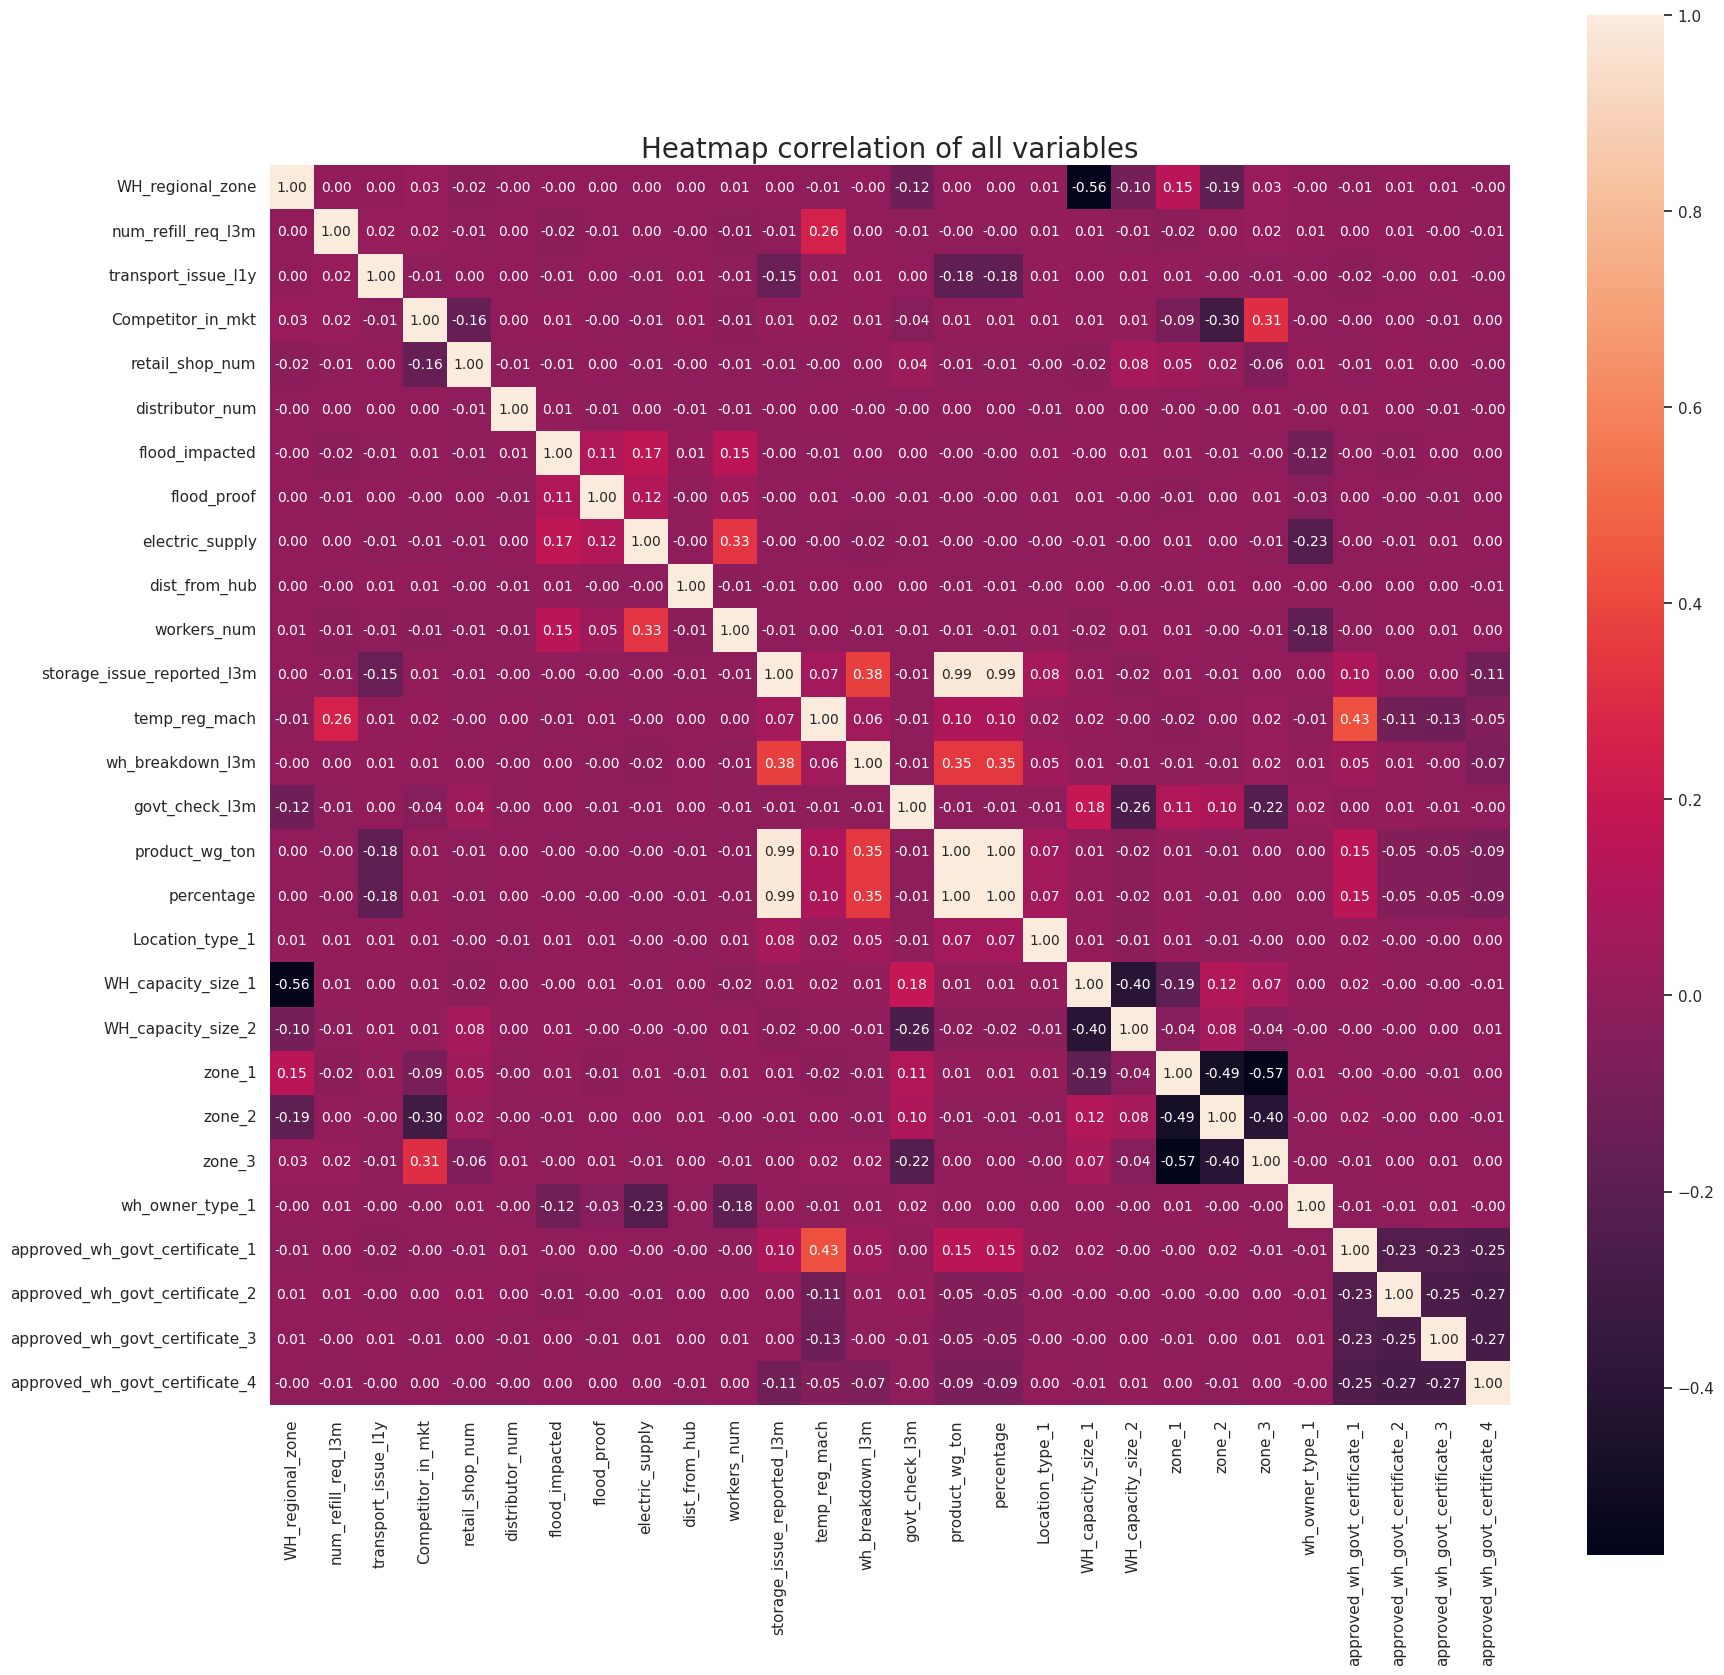

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df1.corr(),cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10})
plt.title('Heatmap correlation of all variables',fontsize =20,fontweight=100)
plt.show()

Correlation Heatmap Befor doing One - Encoding

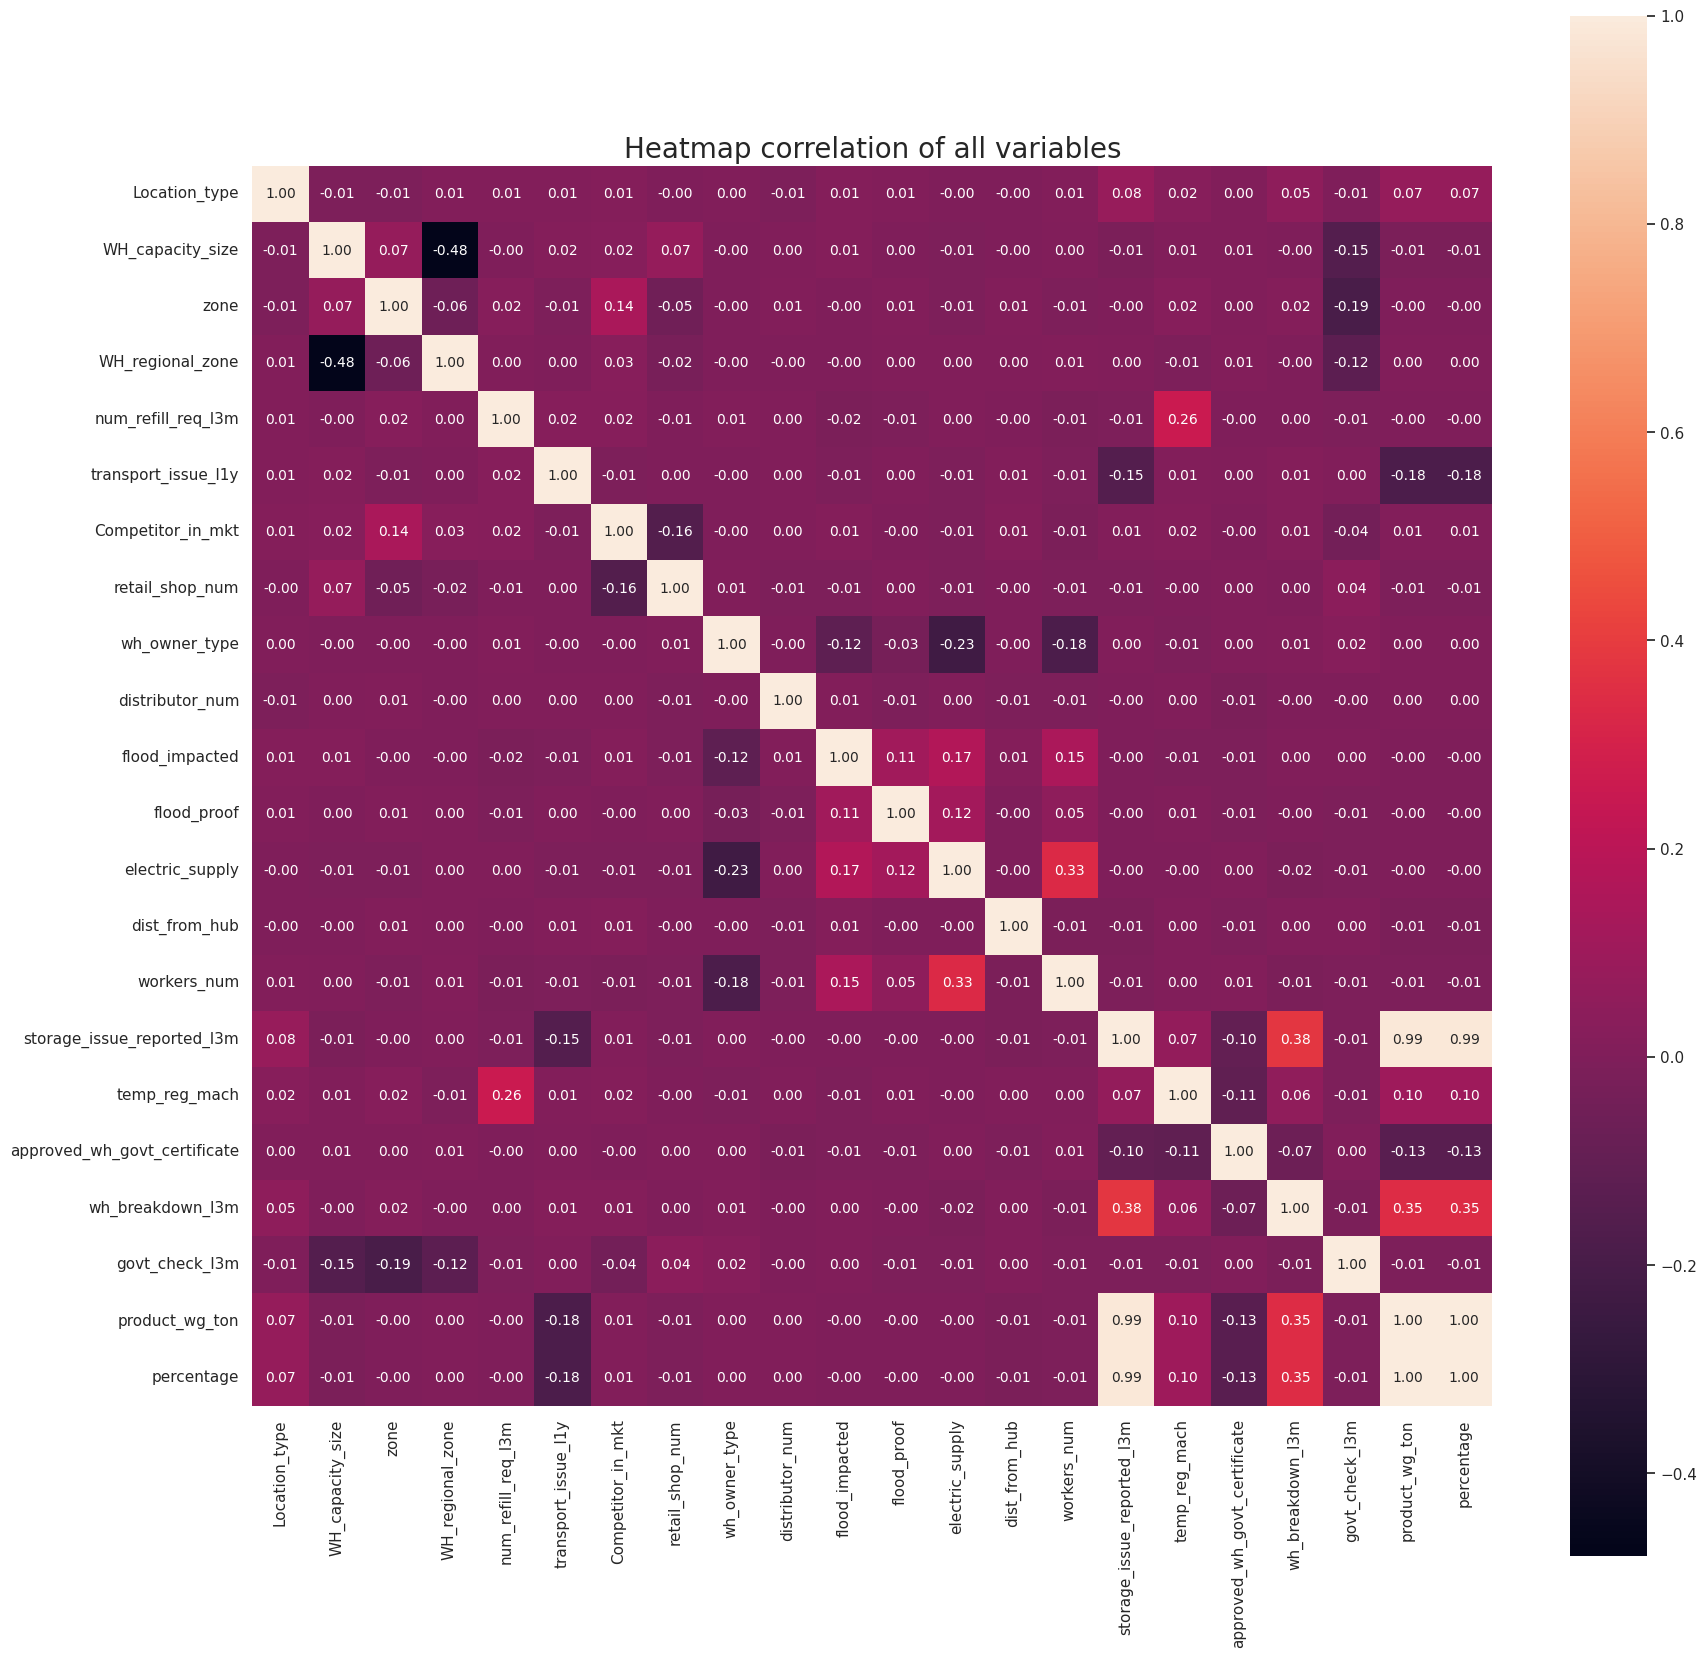

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(),cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10})
plt.title('Heatmap correlation of all variables',fontsize =20,fontweight=100)
plt.show()

note: From above Heatmap correlation it is clear that there is no independent features highly correlated between eachother

In [ ]:
df1.describe()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_1,WH_capacity_size_2,zone_1,zone_2,zone_3,wh_owner_type_1,approved_wh_govt_certificate_1,approved_wh_govt_certificate_2,approved_wh_govt_certificate_3,approved_wh_govt_certificate_4
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,...,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,3.254392,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,...,0.402587,0.191697,0.409146,0.254091,0.320096,0.459988,0.173646,0.199278,0.203189,0.227918
std,1.666568,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,...,0.490434,0.393648,0.491691,0.435362,0.466527,0.498411,0.378816,0.399469,0.402384,0.419502
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


note: From above descriptive Analysis,We can say there is no outllier present in the dataset as all are in range from min value to max is no noisy data

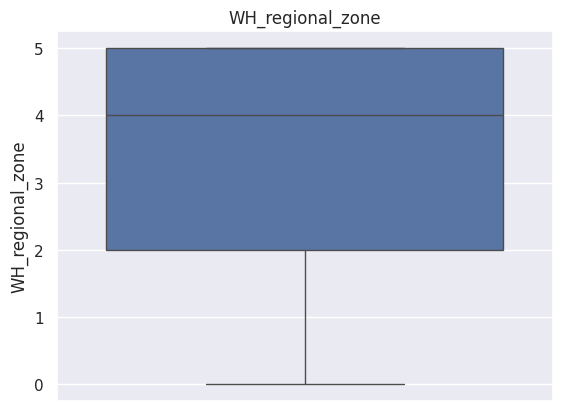

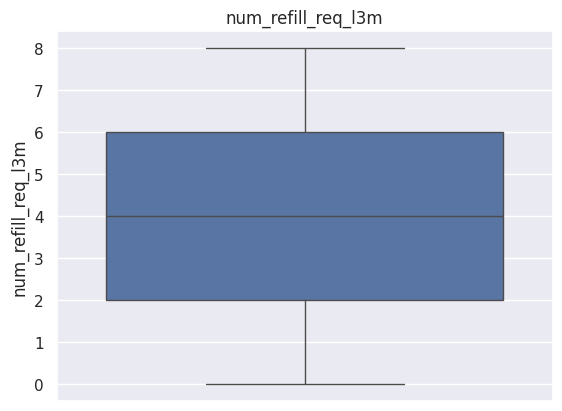

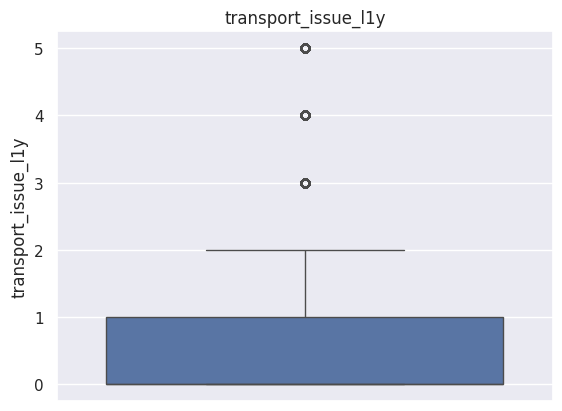

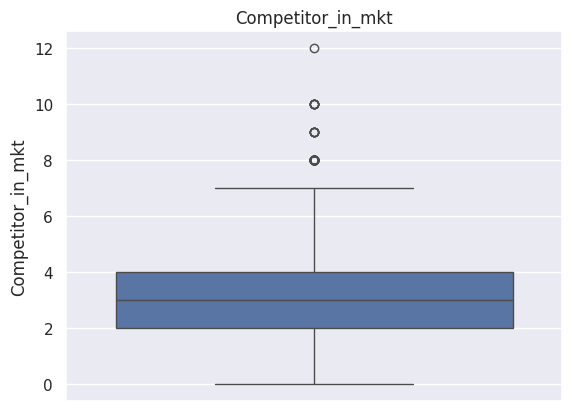

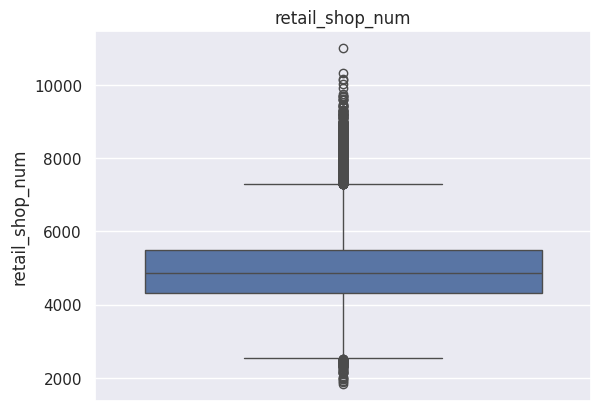

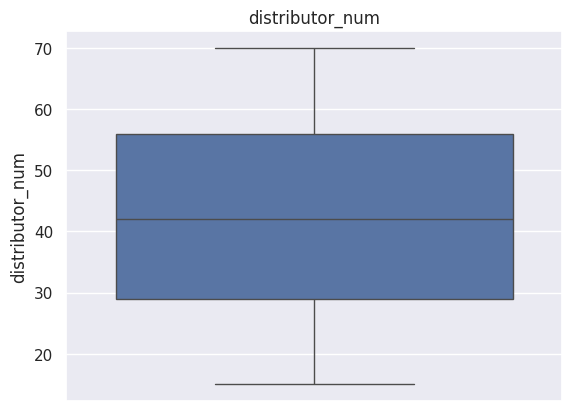

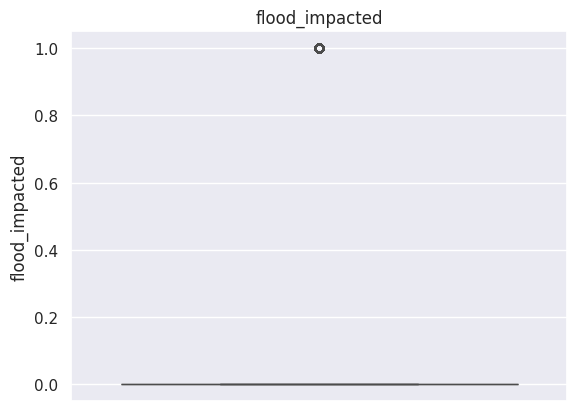

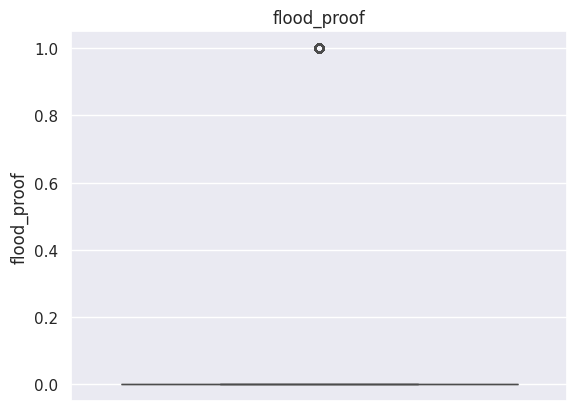

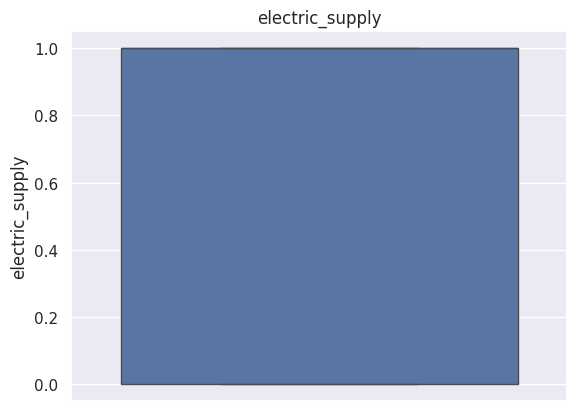

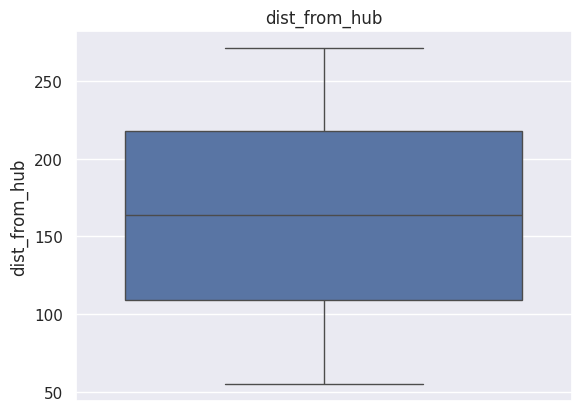

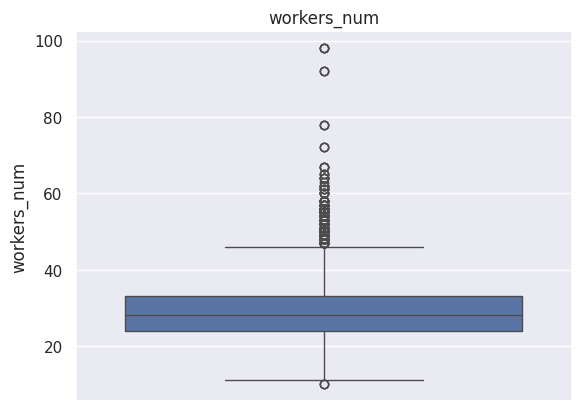

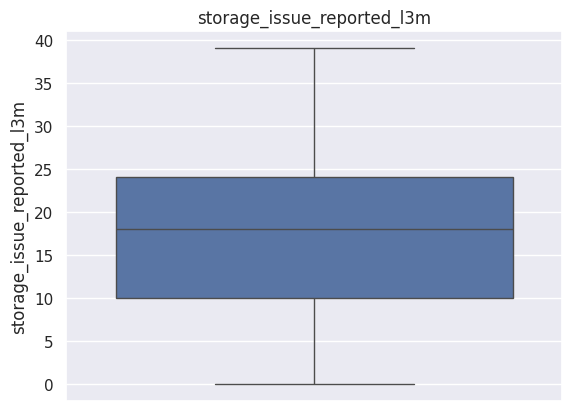

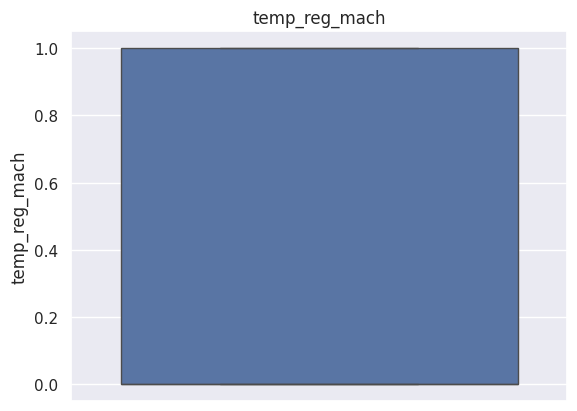

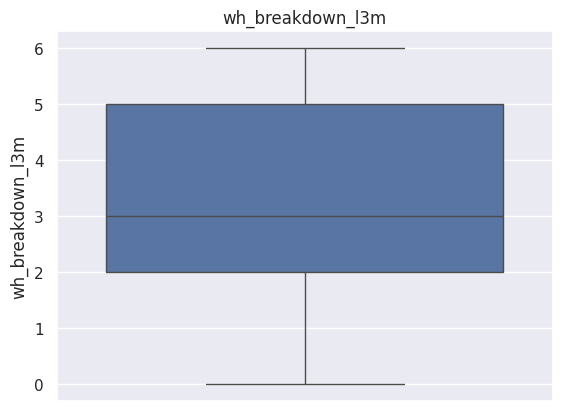

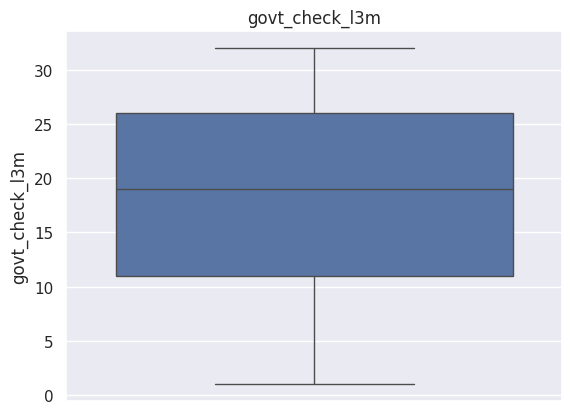

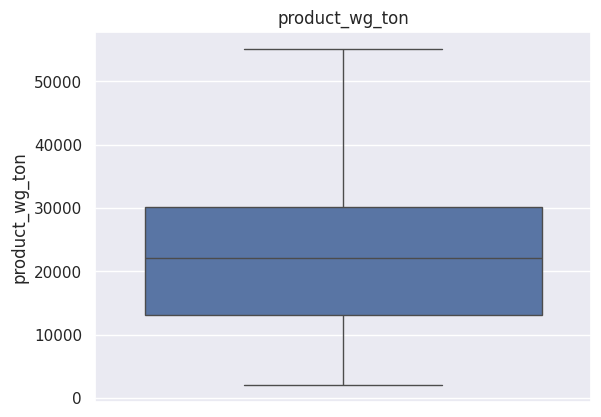

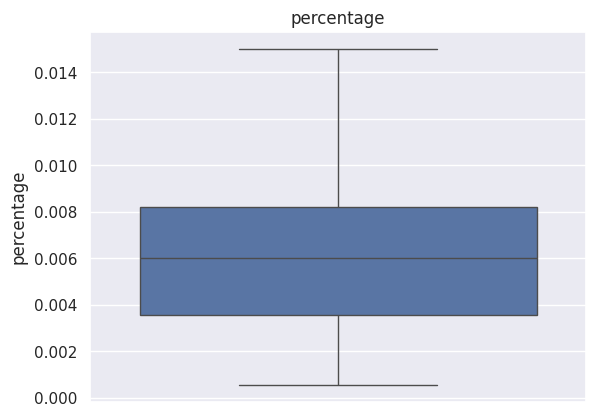

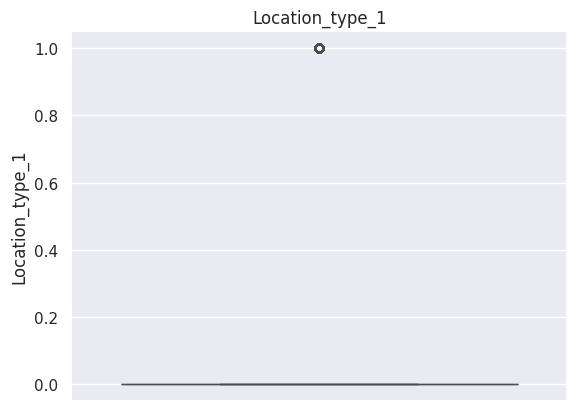

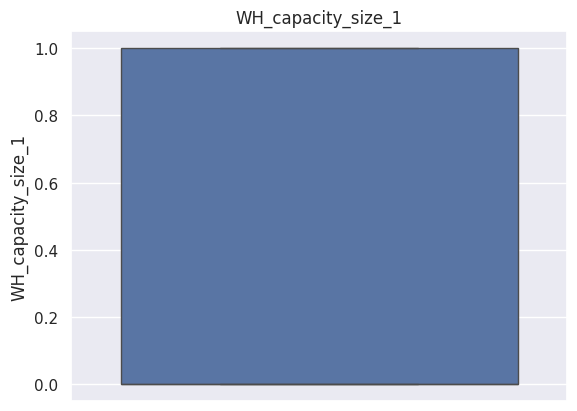

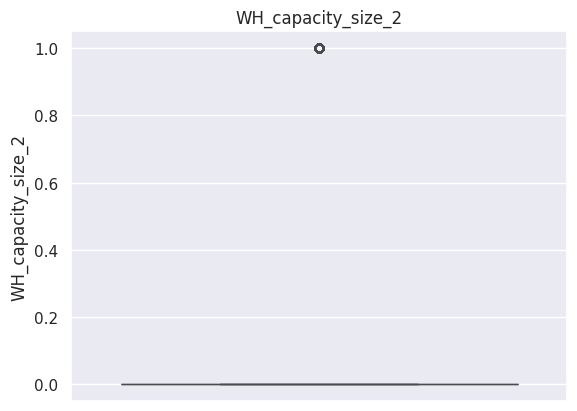

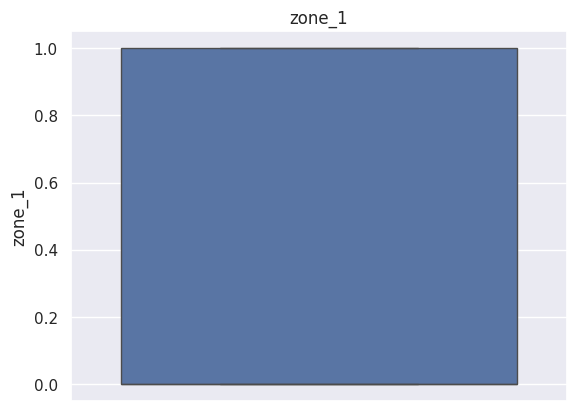

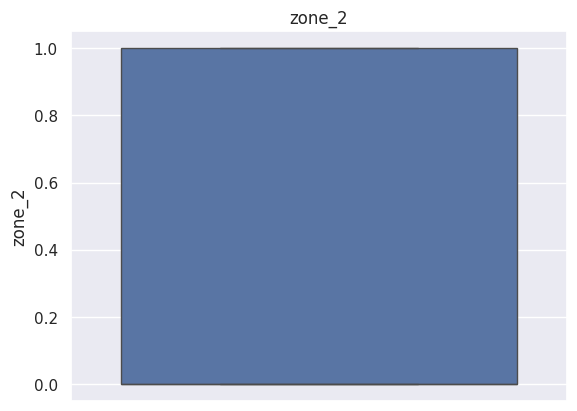

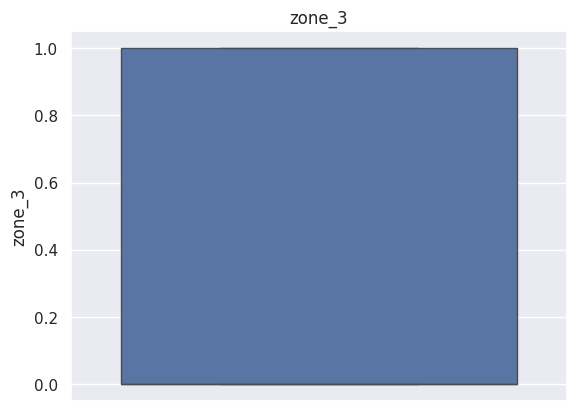

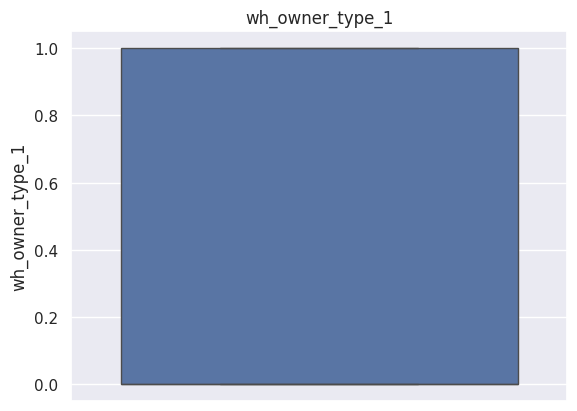

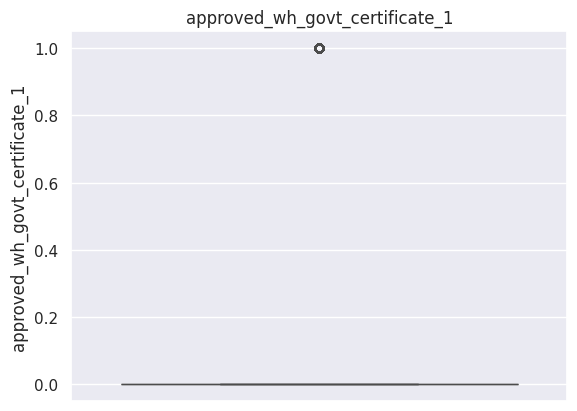

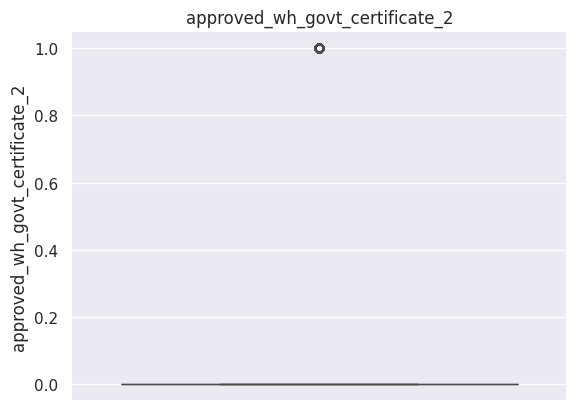

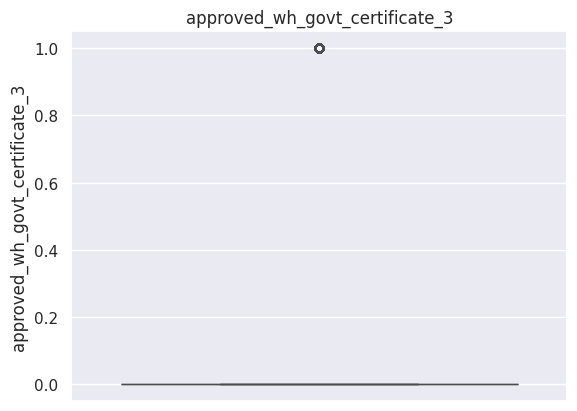

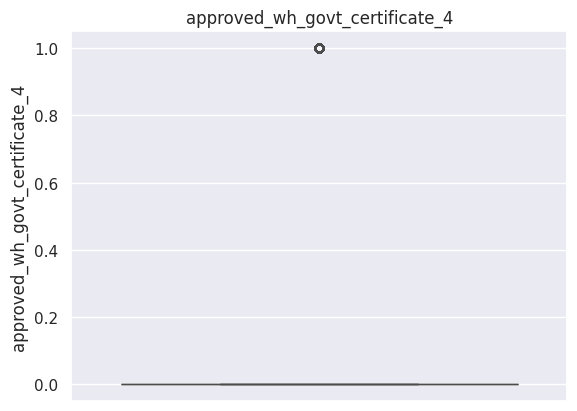

In [ ]:
for i in df1.columns:
  sns.boxplot(df1[i])
  plt.title(i)
  plt.show()

note: from above box plots we are re conforming that there are no abnormal outliers and all are in range lets do standard scaling to make the mean value to zero

EDA of Highly Correlated VARIABLE with the Dependent Variable

Text(0.5, 1.0, 'Storage Issues Vs Production')

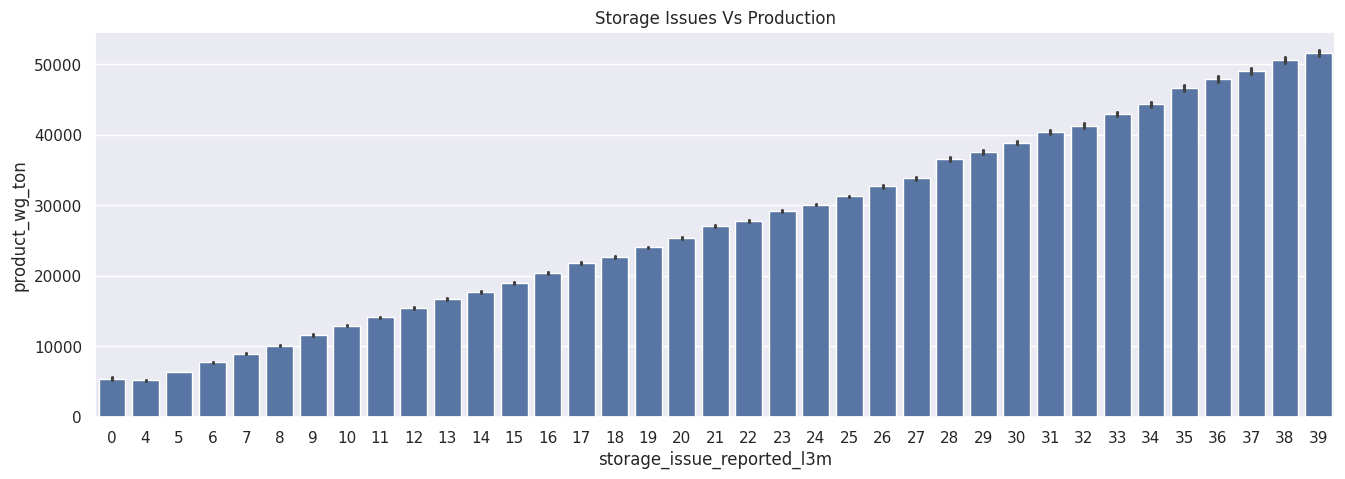

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='storage_issue_reported_l3m', y='product_wg_ton', data = df1)
plt.title('Storage Issues Vs Production')

Note From Above Analysis it is clearly evident that if there is frequent storage issue has been reported when there is more production

Text(0.5, 1.0, 'Warehouse Breakdown Vs Production')

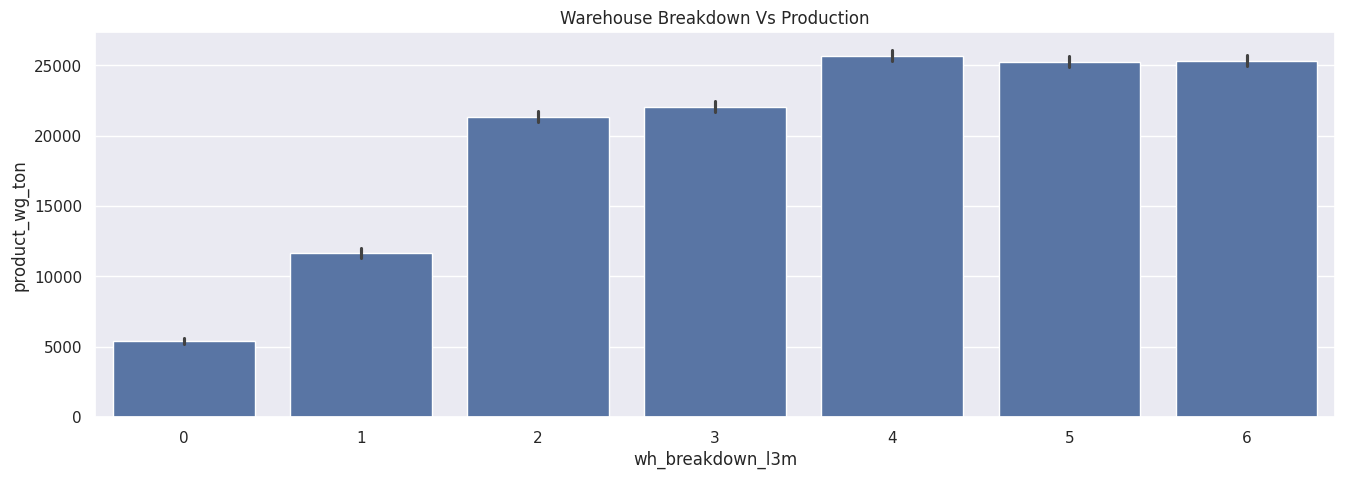

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='wh_breakdown_l3m', y='product_wg_ton', data = df1)
plt.title('Warehouse Breakdown Vs Production')

Note
From Above Analysis it is clearly evident that if there is warehouse breakdown issues occurs the production level of warehouse is high,it proves that whichever warehouse i strying to produce more then their breakdown isssues are also increses

Text(0.5, 1.0, 'Transport Issues Vs Production')

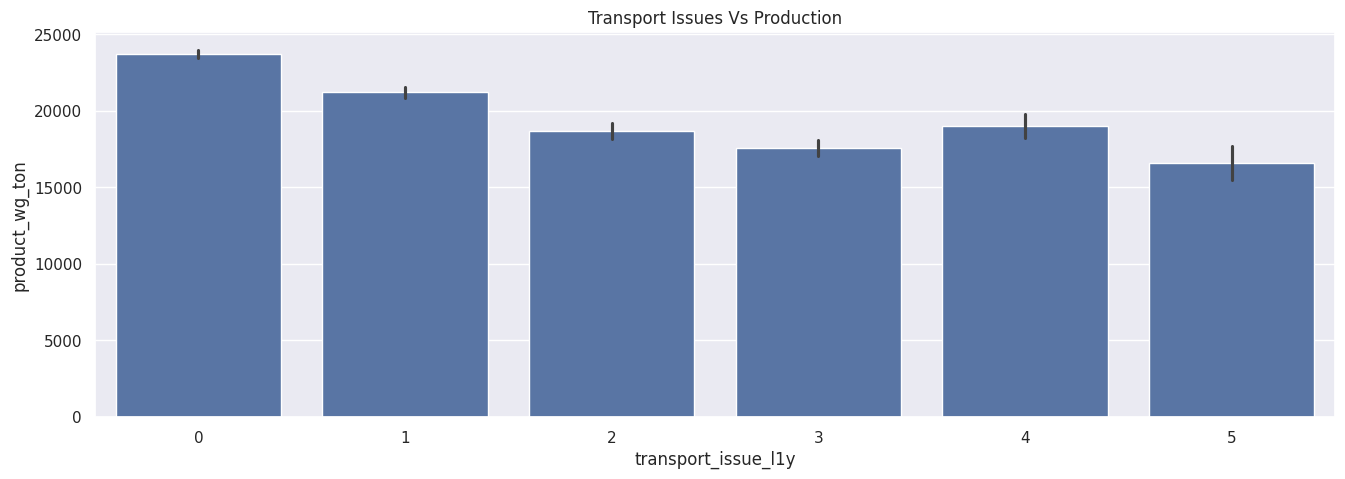

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='transport_issue_l1y', y='product_wg_ton', data = df1)
plt.title('Transport Issues Vs Production')

Note
From the above analysis it is clearly evident that if there is frequent transport issue reported then ther is lesser production in warehouse

Text(0.5, 1.0, 'Temperature Regulation Vs Production')

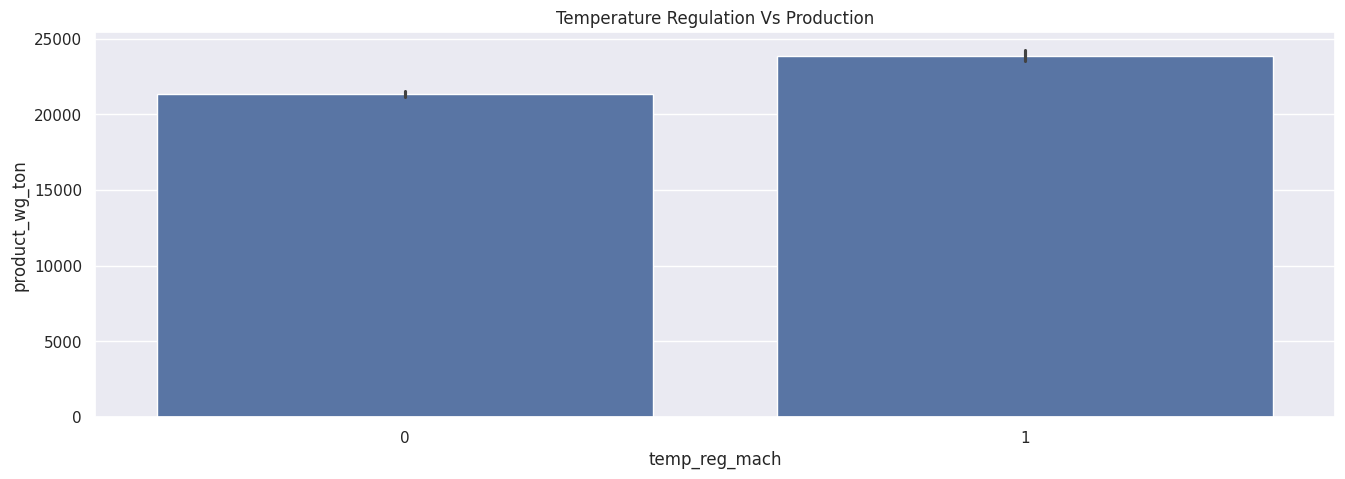

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='temp_reg_mach', y='product_wg_ton', data = df1)
plt.title('Temperature Regulation Vs Production')

Note:
 From Above Analysis it is clearly evident that if there is temperature regulating indicator installed then there is more production in warehouse

<ipython-input-40-9864cd641c5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WH_capacity_size', data=df, palette=['red', 'green', 'blue']).set(title="Warehouse count by WH_capacity_size")


[Text(0.5, 1.0, 'Warehouse count by WH_capacity_size')]

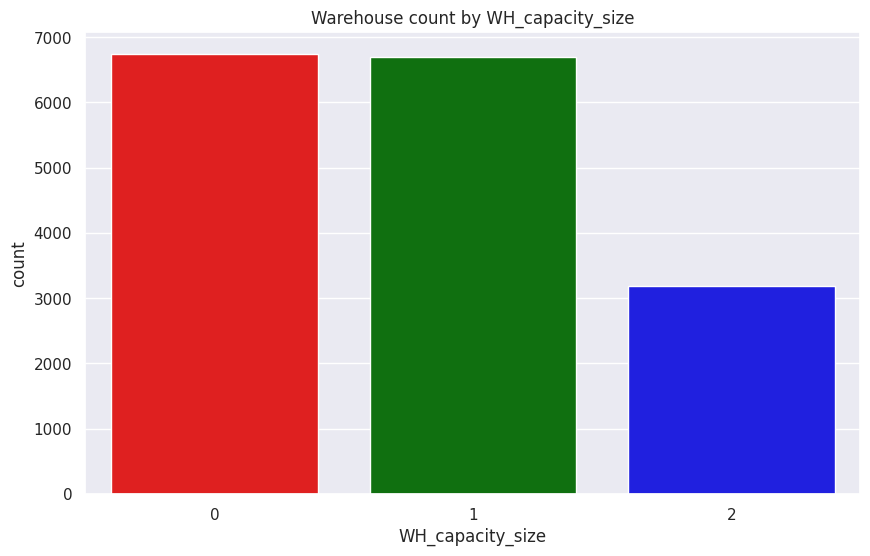

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WH_capacity_size', data=df, palette=['red', 'green', 'blue']).set(title="Warehouse count by WH_capacity_size")


[Text(0.5, 1.0, 'WH_capacity_size By Location_type')]

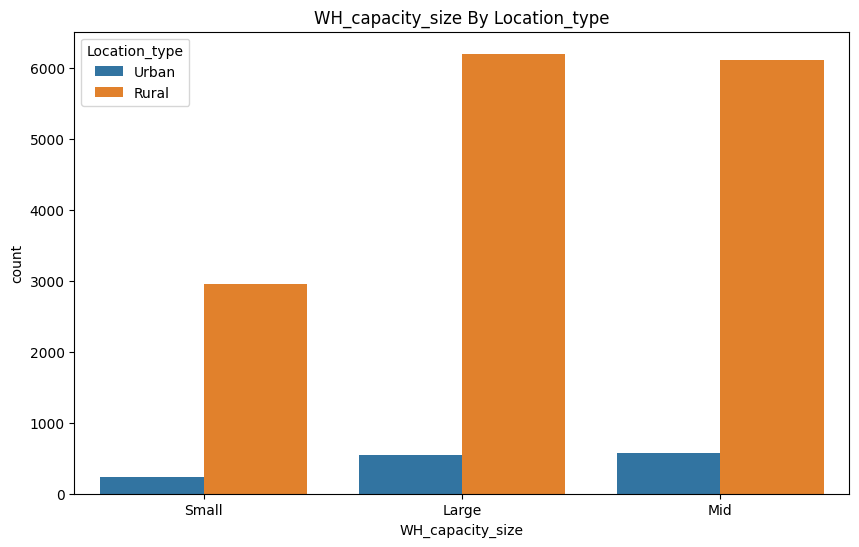

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="WH_capacity_size", hue="Location_type").set(title="WH_capacity_size By Location_type")


[Text(0.5, 1.0, 'WH_capacity_size By zone  ')]

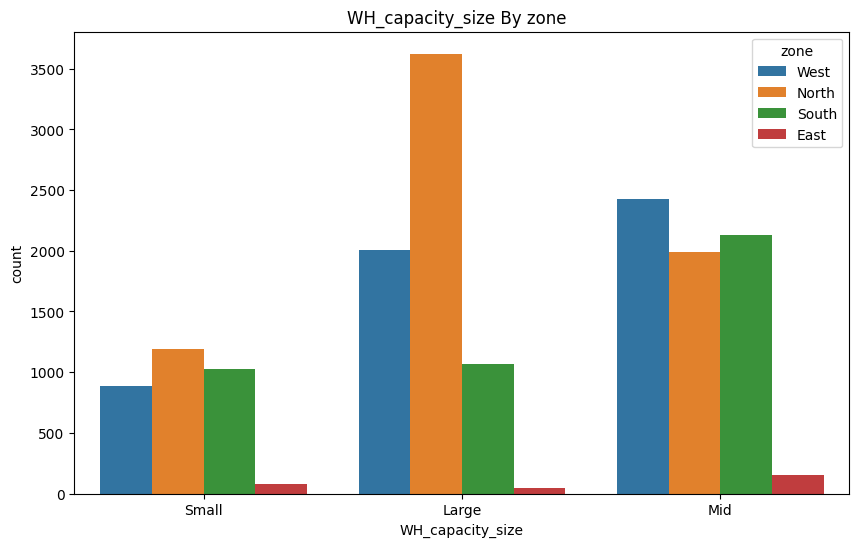

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df,x="WH_capacity_size", hue="zone") .set(title="WH_capacity_size By zone  ")

<ipython-input-16-abf0a9380417>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="WH_regional_zone", palette=colormap, order=order)


Text(0.5, 1.0, 'Wherehouse count by WH_regional_zone')

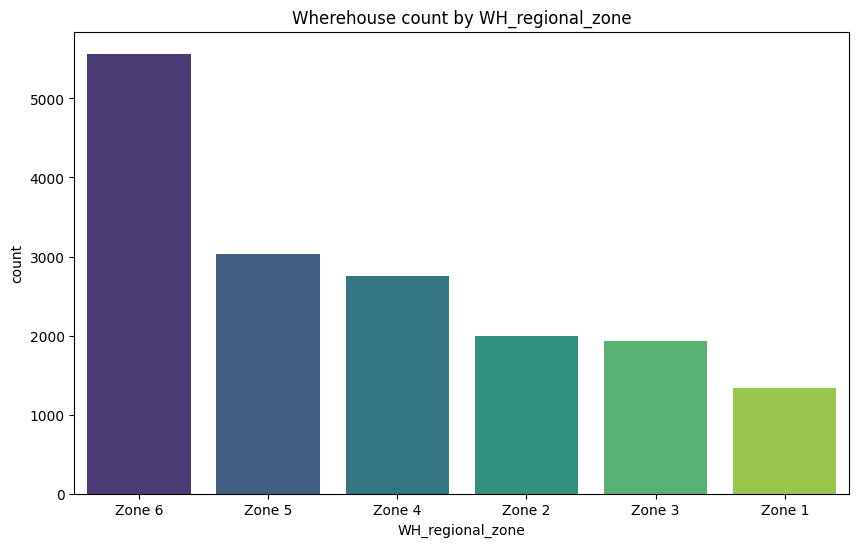

In [ ]:
plt.figure(figsize=(10, 6))

order = df['WH_regional_zone'].value_counts().index

# Create a colormap with a range of colors
colormap = sns.color_palette("viridis", len(order))

sns.countplot(data=df, x="WH_regional_zone", palette=colormap, order=order)
plt.title("Wherehouse count by WH_regional_zone")
# plt.show()


## Feature Engineering

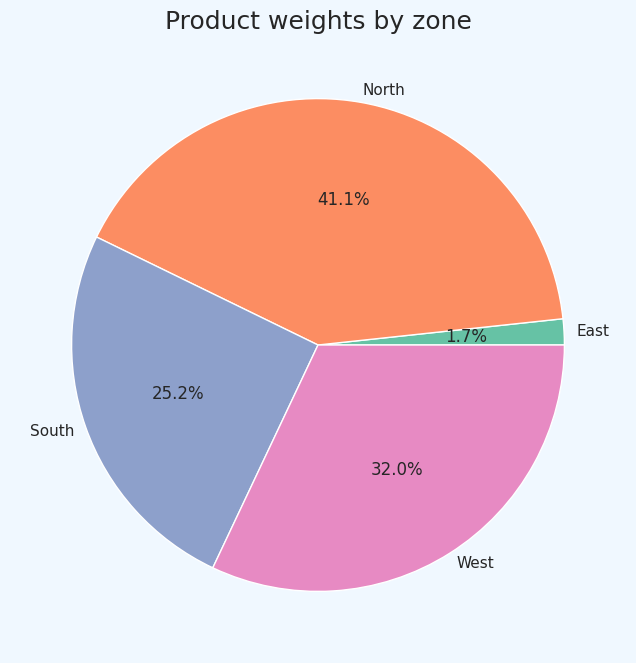

In [ ]:
# Step 1: Calculate total weight
total_weight = df['product_wg_ton'].sum()

# Step 2: Calculate percentages
df['percentage'] = (df['product_wg_ton'] / total_weight) * 100

# Step 3: Group by zone and sum percentages
zone_percentages = df.groupby('zone')['percentage'].sum()

# Step 4: Plot pie chart
labels = ['East', 'North', 'South', 'West']
sns.set(font_scale=1)
plt.figure(figsize=(12,8), facecolor='aliceblue')
plt.pie(zone_percentages, labels=labels,
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        labeldistance=1.05)
plt.title('Product weights by zone', fontsize=18)
plt.show()


## Data Preprocessing

In [ ]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
df['Location_type'] = le.fit_transform(df['Location_type'])

# Encode 'WH_capacity_size' column
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

# Encode 'zone' column
df['zone'] = le.fit_transform(df['zone'])

# Encode 'WH_regional_zone' column
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])

# Encode 'wh_owner_type' column
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])


## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Product Weight')
    plt.ylabel('Predicted Product Weight')
    plt.title(f'Actual vs Predicted Product Weight - {model_name}')
    plt.show()

In [ ]:
# Split data into features (X) and labels (y)
X = df.drop('product_wg_ton', axis=1)
y = df['product_wg_ton']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')

Linear Regression - MSE: 2.6792688615790993e-22, R-squared: 1.0


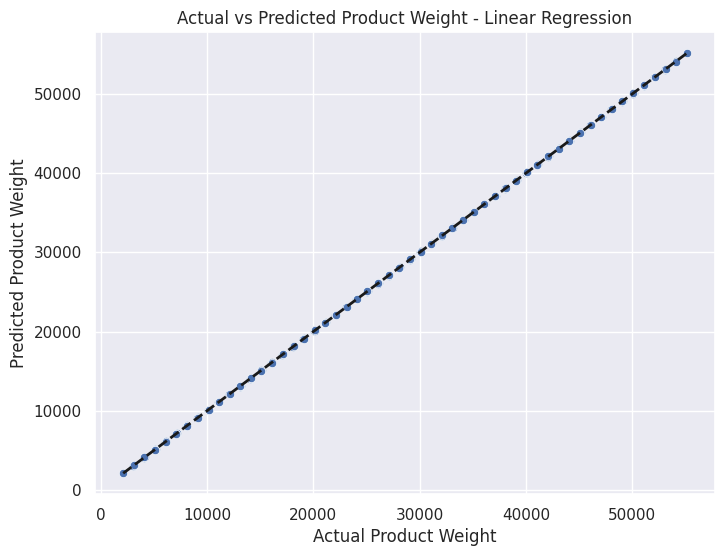

In [ ]:
# Scatter plot for Linear Regression model
scatter_plot('Linear Regression', y_test, linear_reg_predictions)

In [ ]:
# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)

# Evaluate Decision Tree model
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')



Decision Tree - MSE: 1.9163658243080626, R-squared: 0.9999999858877453


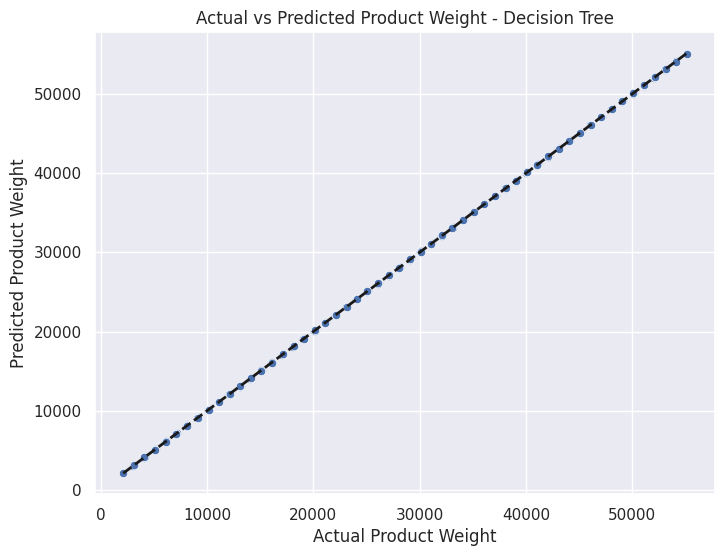

In [ ]:
# Scatter plot for Decision Tree model
scatter_plot('Decision Tree', y_test, decision_tree_predictions)

In [ ]:
# Initialize and train Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')



Random Forest - MSE: 3.578794855595807, R-squared: 0.9999999736454993


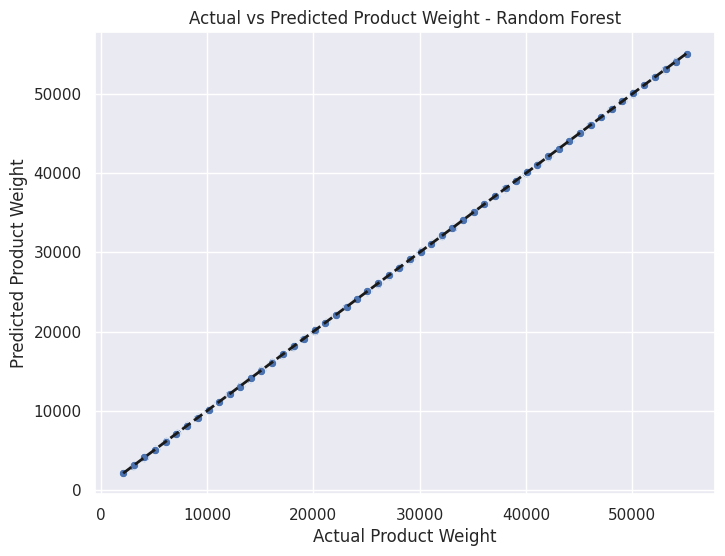

In [ ]:
# Scatter plot for Random Forest model
scatter_plot('Random Forest', y_test, random_forest_predictions)

In [ ]:
# Initialize and train Support Vector Machine (SVR) model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Evaluate SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f'SVR - MSE: {svr_mse}, R-squared: {svr_r2}')



SVR - MSE: 128553967.96077874, R-squared: 0.053319407491378645


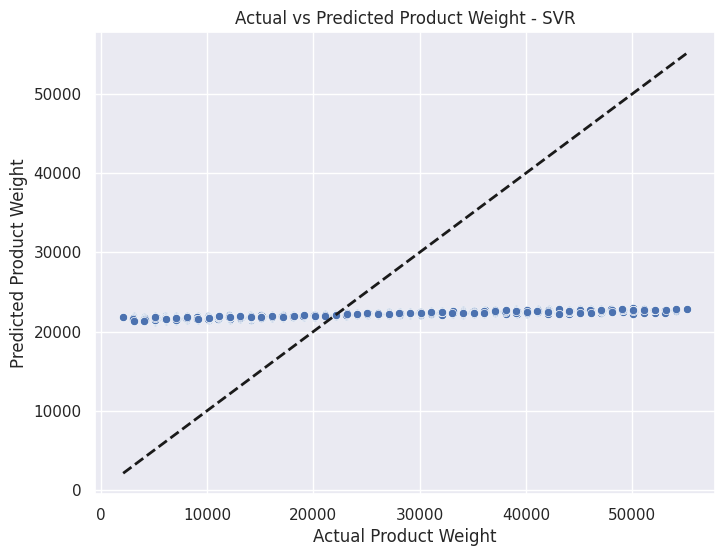

In [ ]:
# Scatter plot for SVR model
scatter_plot('SVR', y_test, svr_predictions)

In [ ]:
# Initialize and train XGBoost model
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
xgboost_predictions = xgboost_model.predict(X_test_scaled)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
print(f'XGBoost - MSE: {xgboost_mse}, R-squared: {xgboost_r2}')



XGBoost - MSE: 29314.282768937403, R-squared: 0.9997841275300882


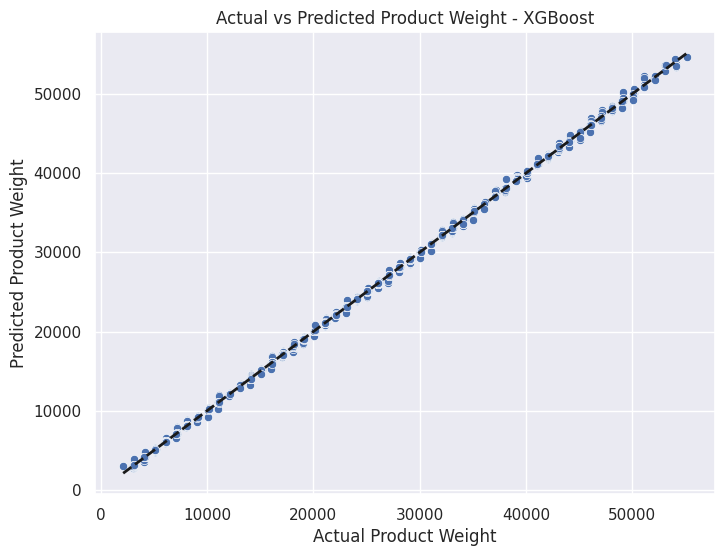

In [ ]:
# Scatter plot for XGBoost model
scatter_plot('XGBoost', y_test, xgboost_predictions)

In [ ]:
# Initialize and train Neural Network model
neural_network_model = MLPRegressor(max_iter=1000)
neural_network_model.fit(X_train_scaled, y_train)

# Evaluate Neural Network model
neural_network_predictions = neural_network_model.predict(X_test_scaled)
neural_network_mse = mean_squared_error(y_test, neural_network_predictions)
neural_network_r2 = r2_score(y_test, neural_network_predictions)
print(f'Neural Network - MSE: {neural_network_mse}, R-squared: {neural_network_r2}')


Neural Network - MSE: 419.4941126311028, R-squared: 0.9999969108154233


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


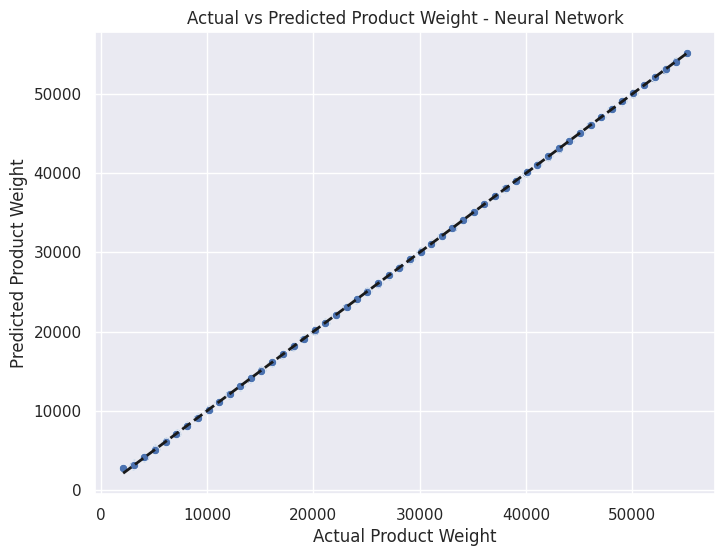

In [ ]:
# Scatter plot for Neural Network model
scatter_plot('Neural Network', y_test, neural_network_predictions)

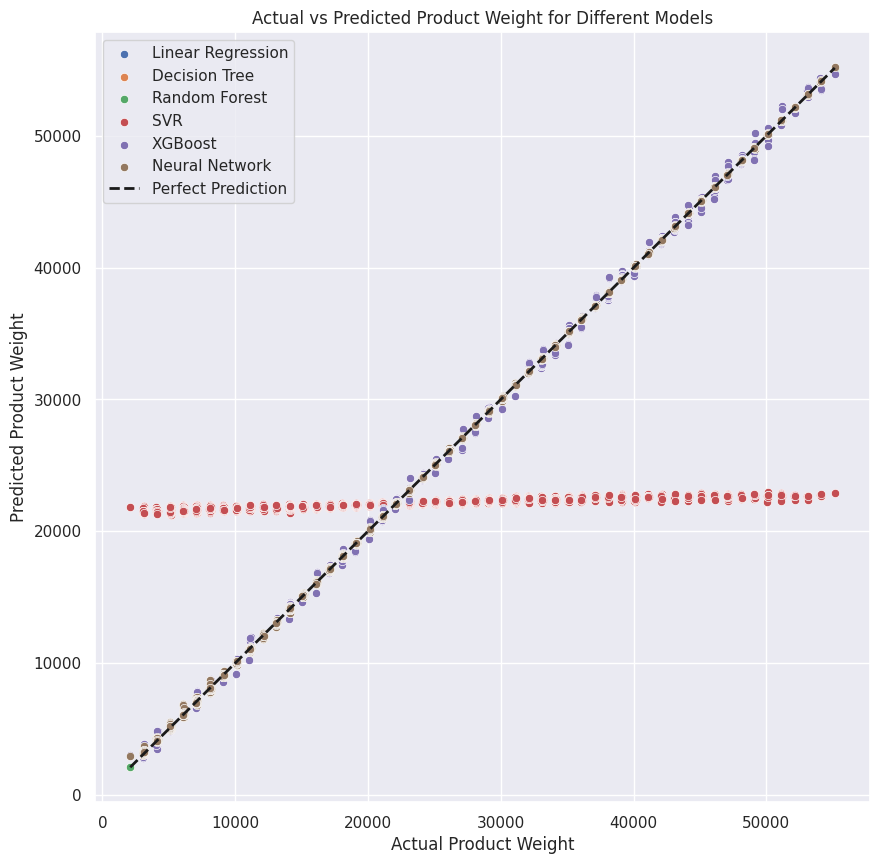

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual vs predicted values for each model
results_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': linear_reg_predictions,
                            'Decision Tree': decision_tree_predictions,
                            'Random Forest': random_forest_predictions,
                            'SVR': svr_predictions, 'XGBoost': xgboost_predictions,
                            'Neural Network': neural_network_predictions})

# Scatter plots for each model
plt.figure(figsize=(10, 10))

for model_name in results_df.columns[1:]:
    sns.scatterplot(x='Actual', y=model_name, data=results_df, label=model_name)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Product Weight')
plt.ylabel('Predicted Product Weight')
plt.title('Actual vs Predicted Product Weight for Different Models')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to store model names and MSE values
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Neural Network'],
    'MSE': [linear_reg_mse, decision_tree_mse, random_forest_mse, svr_mse, xgboost_mse, neural_network_mse]
})

# Find the best model (lowest MSE)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print("Model Comparison:")
print(results_df)

print("\nBest Model:")
print(f"{best_model['Model']} has the lowest Mean Squared Error: {best_model['MSE']}")


Model Comparison:
               Model           MSE
0  Linear Regression  2.679269e-22
1      Decision Tree  1.982250e+00
2      Random Forest  1.630887e+00
3                SVR  1.285540e+08
4            XGBoost  2.931428e+04
5     Neural Network  4.789202e+03

Best Model:
Linear Regression has the lowest Mean Squared Error: 2.6792688615790993e-22


## Conclusion and Results

The comprehensive analysis and modeling undertaken in this project have provided valuable insights into optimizing the supply quantity for the FMCG company's instant noodles business. Linear Regression emerged as the best-performing model, achieving an impressively low Mean Squared Error. The visualizations and exploratory data analysis have enriched our understanding of the dataset, uncovering trends and relationships crucial for informed decision-making in the supply chain management process. The combination of data cleaning, feature engineering, and advanced modeling techniques has contributed to a robust solution for the company's supply chain optimization.